<a href="https://colab.research.google.com/github/dharaneyogees/bio/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING** **DATA**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EXPLORING** **DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid')

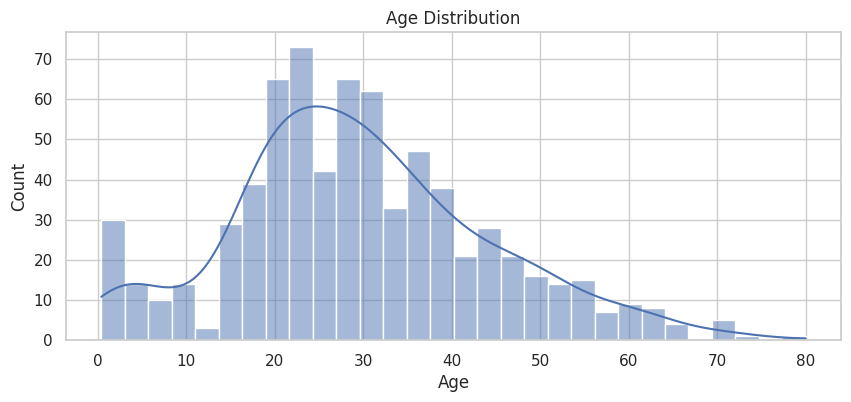

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

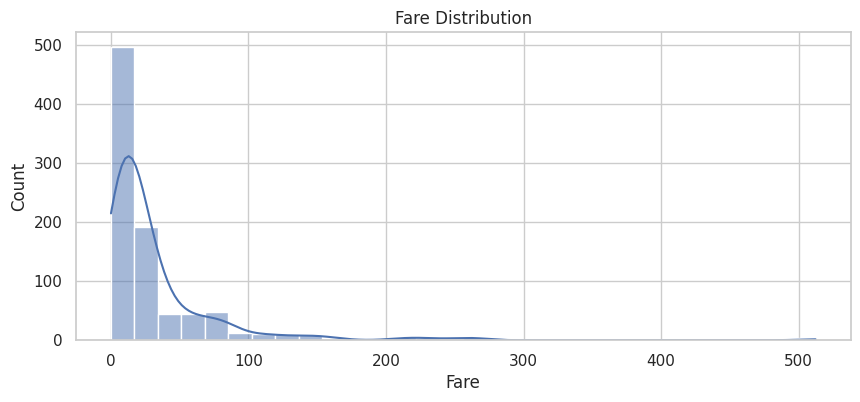

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Fare'],bins=30,kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

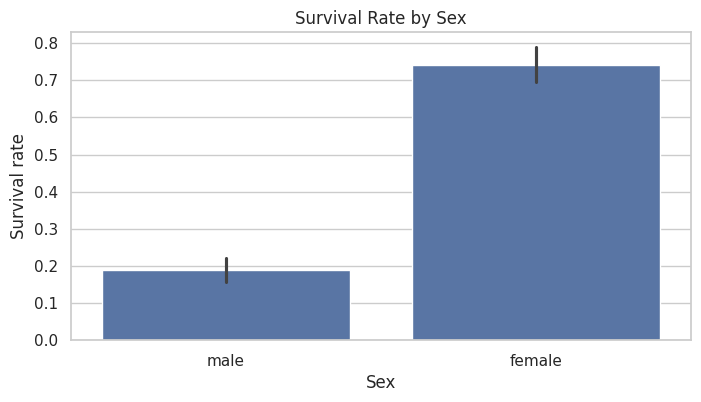

In [ ]:
# survival rate by sex
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Sex',y='Survived')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.show()

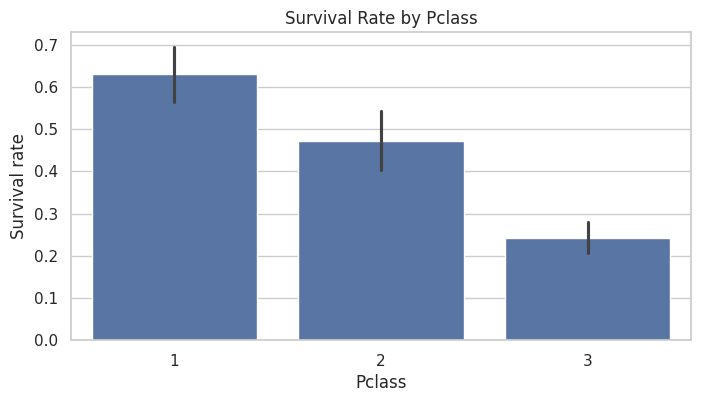

In [ ]:
# survival rate by Pclass
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Pclass',y='Survived')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival rate')
plt.show()

**DATA** **PREPROCESSING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# handling missing values
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Cabin'].fillna('U',inplace=True)

In [ ]:
#df.drop(['PassengerId','Name','Ticket'],axis=1)#inplace=Ture)

In [ ]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df['Cabin']=le.fit_transform(df['Cabin'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


**FEATURE** **SELECTION**

In [ ]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x=df[features]
y=df['Survived']

**MODEL** **BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# spliting the data into training and tetsing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# model training
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predictions
y_pred=model.predict(x_test)

**MODEL** **EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Accuracy score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.8212290502793296


In [ ]:
# Classification report
report=classification_report(y_test,y_pred)
print('Classification_report:',report)


Classification_report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
# Confusion matrix
confusion=confusion_matrix(y_test,y_pred)
print('Confusion_matrix:',confusion)

Confusion_matrix: [[92 13]
 [19 55]]


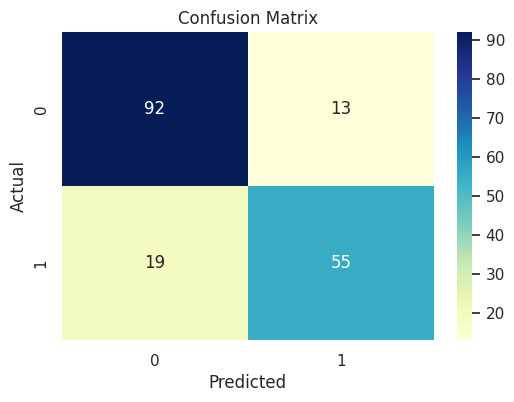

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

#plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion,annot=True,fmt='d',cmap='YlGnBu')#,xticklabel=['Not survivred','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()